In [1]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt

# version 1: histogram

In [102]:
def draw_results(n_nodes, seed):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'v11/v{n_nodes}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'v11/v{n_nodes}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    fig, axs = plt.subplots(3, 2, figsize=(10, 8))
    sns.histplot((np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(), bins=50, ax=axs[0][0])
    axs[0][0].set_title('|W11| - |W21|')
    sns.histplot((np.abs(W_est[:n_nodes, n_nodes:]) -  np.abs(W_est[n_nodes:, n_nodes:])).flatten(), bins=50, ax=axs[0][1])
    axs[0][1].set_title('|W12| - |W22|')
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    sns.histplot((np.abs(W_est_1[:n_nodes, :n_nodes]) -  np.abs(W_est_1[n_nodes:, :n_nodes]))[~B_true].flatten(), bins=50, ax=axs[1][0])
    axs[1][0].set_title('|dag(W11)| - |dag(W21)|')
    sns.histplot((np.abs(W_est_1[:n_nodes, n_nodes:]) -  np.abs(W_est_1[n_nodes:, n_nodes:])).flatten(), bins=50, ax=axs[1][1])
    axs[1][1].set_title('|dag(W12)| - |dag(W22)|')

    sns.lineplot(x=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 y=(np.abs(W_est_1[:n_nodes, :n_nodes]) -  np.abs(W_est_1[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 ax=axs[2][0]
                )
    sns.lineplot(x=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 y=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 ax=axs[2][0], linestyle='--'
                )
    axs[2][0].set_xlabel("|W11| - |W21| before DAG")
    axs[2][0].set_ylabel("|W11| - |W21| after DAG")
    
    sns.scatterplot(x=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 y=(np.abs(W_est_1[:n_nodes, :n_nodes]) -  np.abs(W_est_1[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 ax=axs[2][1]
                )
    
    
    sns.lineplot(x=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 y=(np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(),
                 ax=axs[2][1], linestyle='--'
                )
    axs[2][1].set_xlabel("|W11| - |W21| before DAG")
    axs[2][1].set_ylabel("|W11| - |W21| after DAG")
    
    print("after DAG filtering, |W11| non-0 num: ", ((np.abs(W_est_1[:n_nodes, :n_nodes])[~B_true] != 0.)).sum())
    print("after DAG filtering, |W21| non-0 num: ", ((np.abs(W_est_1[n_nodes:, :n_nodes])[~B_true] != 0.)).sum())
    print("after DAG filtering, |W11| - |W21| non-0 num: ", ((np.abs(W_est_1[:n_nodes, :n_nodes]) -  np.abs(W_est_1[n_nodes:, :n_nodes]))[~B_true] != 0.).sum())
    
    # Adjust spacing between subplots
    plt.tight_layout()
    # plt.legend()
    
    # Show the plot
    plt.show()

    return W_est, W_est_1, B_true

after DAG filtering, |W11| non-0 num:  12
after DAG filtering, |W21| non-0 num:  3
after DAG filtering, |W11| - |W21| non-0 num:  14


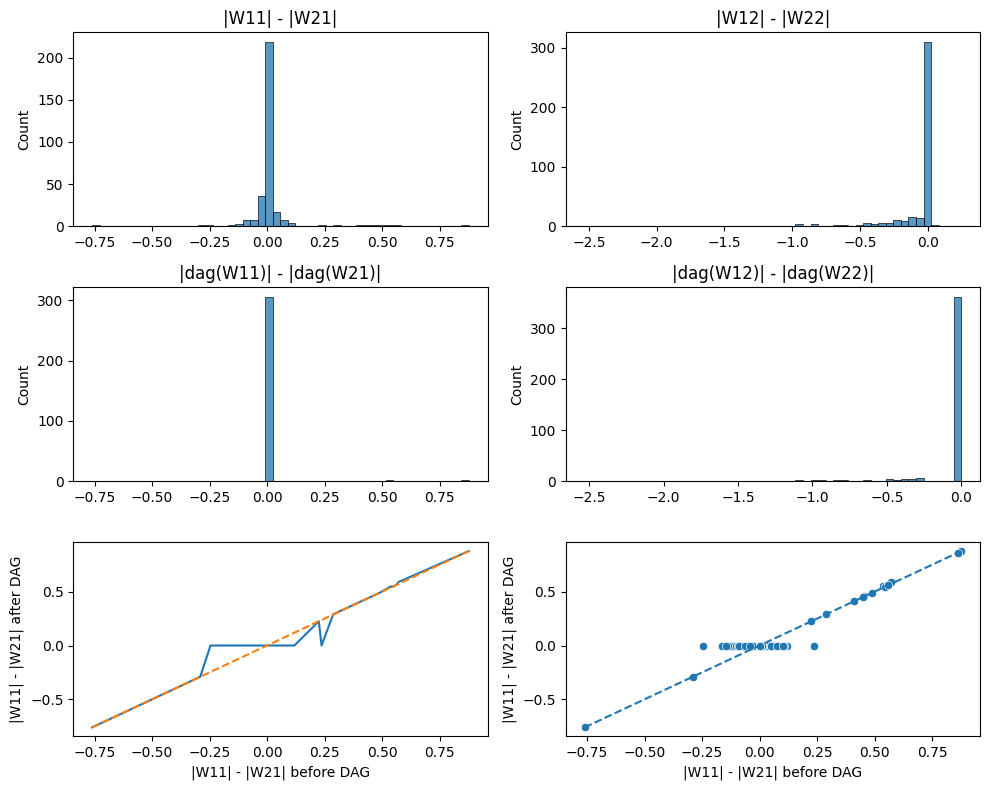

In [103]:
W_est, W_est_1, B_true = draw_results(20, 1)

DAG filtering, |W11| non-0 num:  12
DAG filtering, |W21| non-0 num:  17
DAG filtering, |W11| - |W21| non-0 num:  28


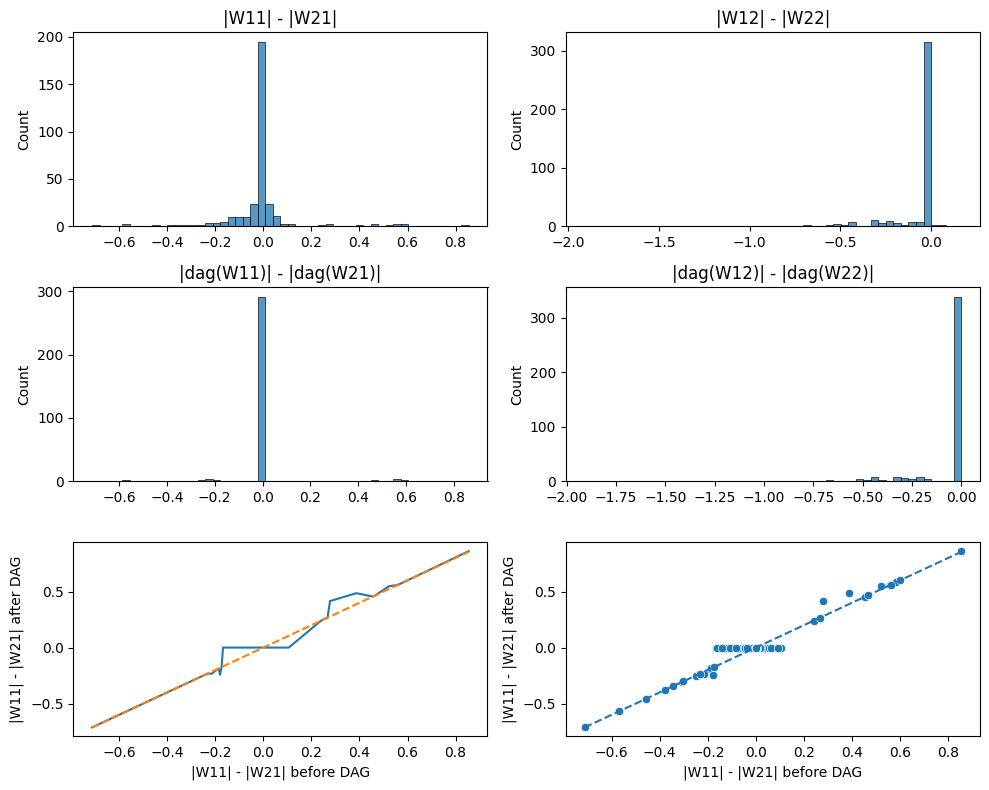

In [95]:
W_est, W_est_1, B_true = draw_results(20, 2)

DAG filtering, |W11| non-0 num:  13
DAG filtering, |W21| non-0 num:  6
DAG filtering, |W11| - |W21| non-0 num:  19


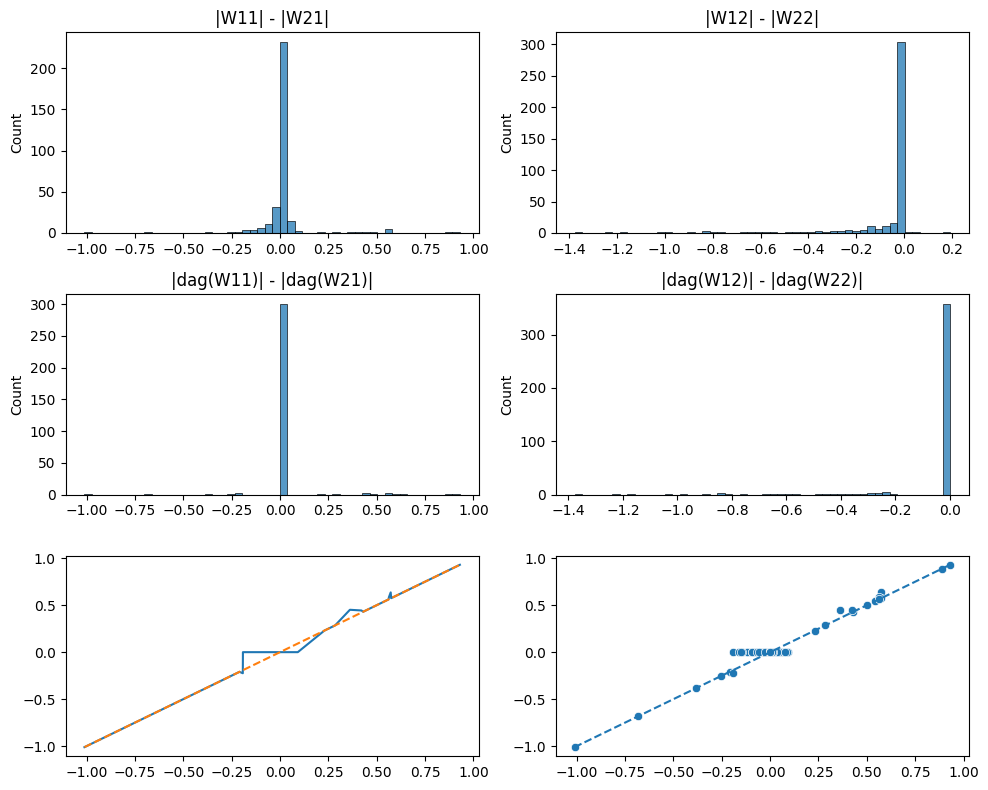

In [88]:
W_est, W_est_1, B_true = draw_results(20, 3)

DAG filtering, |W11| non-0 num:  14
DAG filtering, |W21| non-0 num:  30
DAG filtering, |W11| - |W21| non-0 num:  44


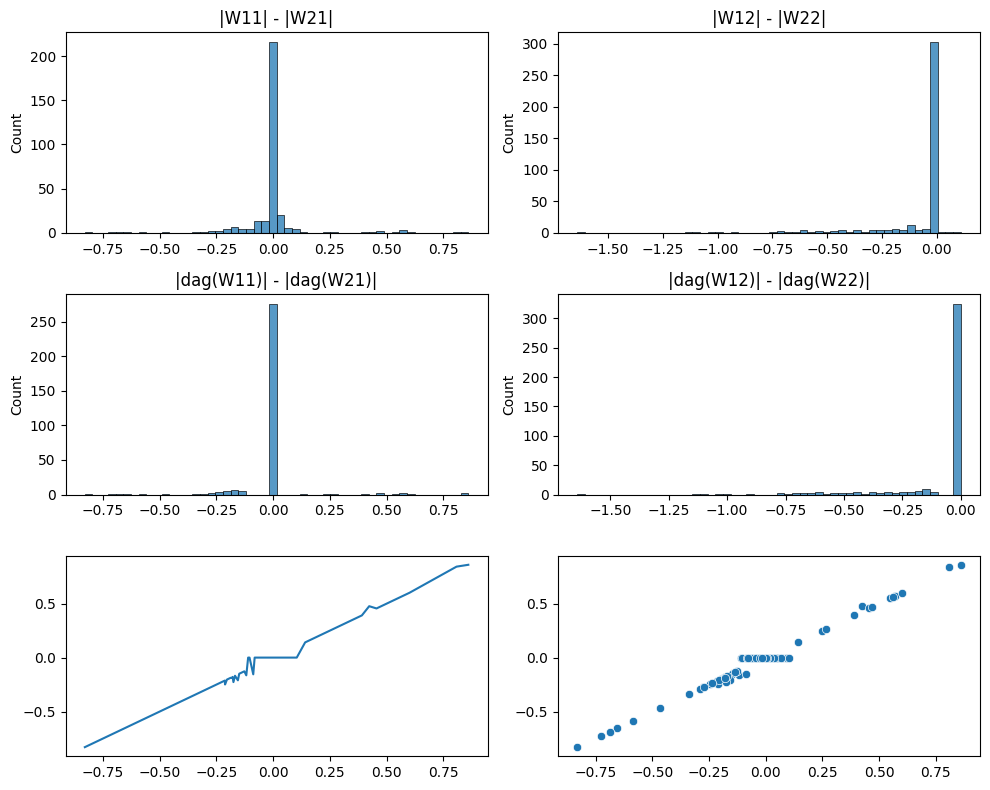

In [72]:
W_est, W_est_1, B_true = draw_results(20, 4)

after DAG filtering, |W11| non-0 num:  26
after DAG filtering, |W21| non-0 num:  34
after DAG filtering, |W11| - |W21| non-0 num:  59


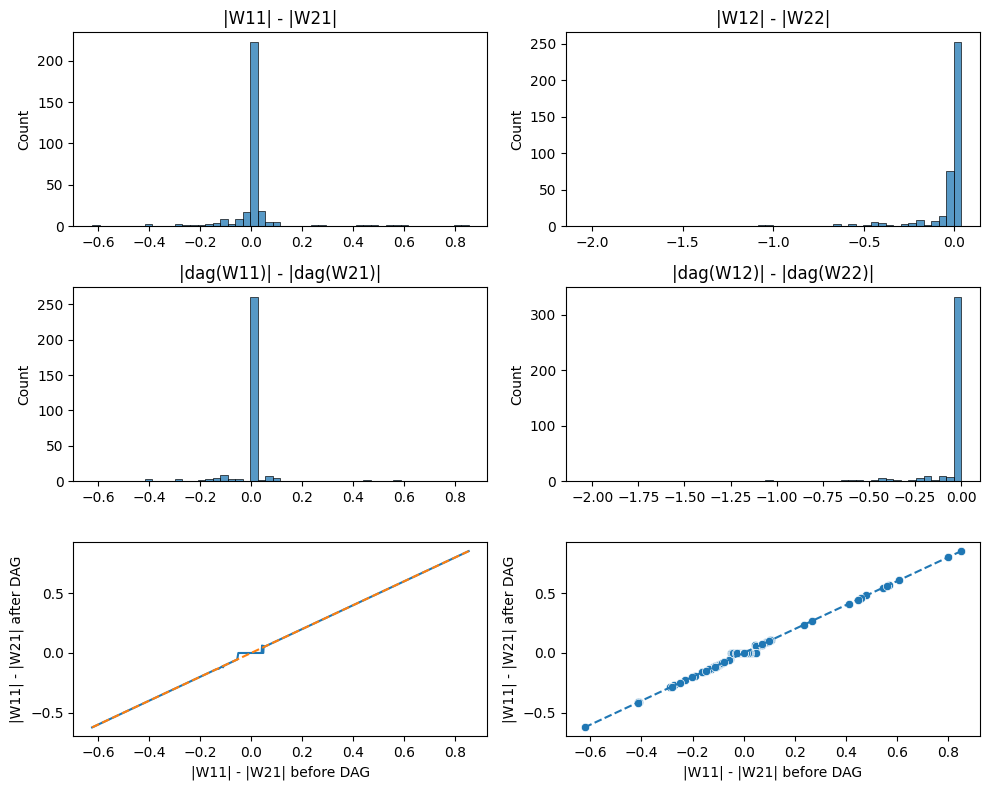

In [100]:
W_est, W_est_1, B_true = draw_results(20, 5)

after DAG filtering, |W11| non-0 num:  0
after DAG filtering, |W21| non-0 num:  1
after DAG filtering, |W11| - |W21| non-0 num:  1


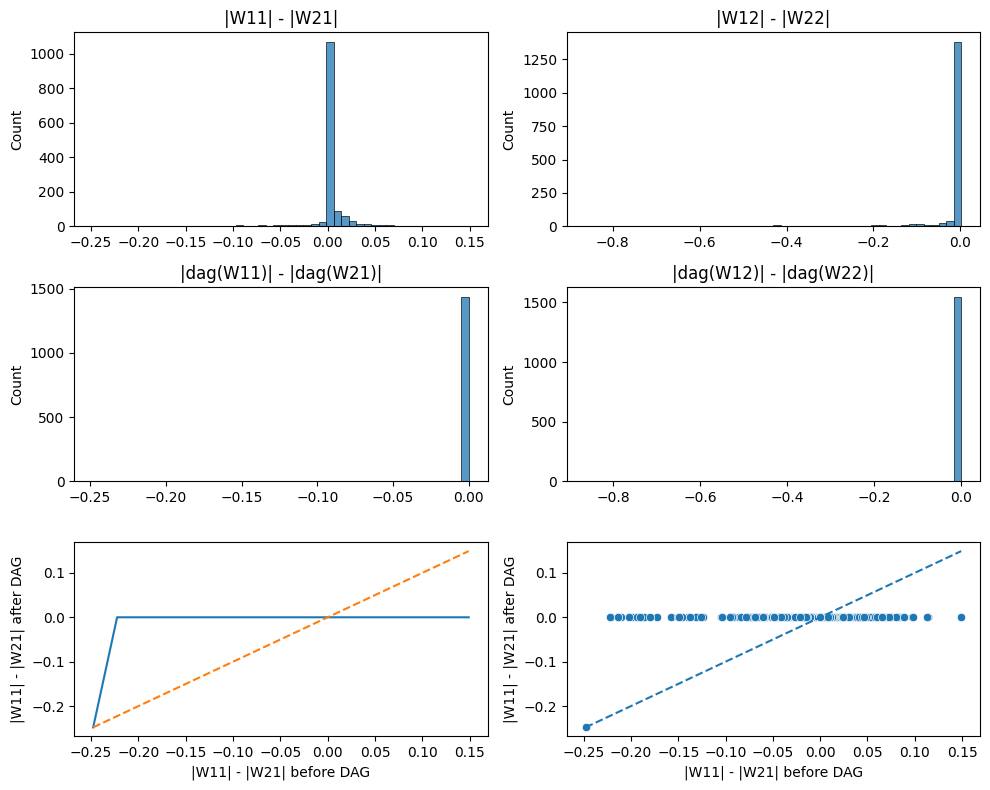

In [101]:
W_est, W_est_1, B_true = draw_results(40, 1)

DAG filtering, |W11| non-0 num:  0
DAG filtering, |W21| non-0 num:  4
DAG filtering, |W11| - |W21| non-0 num:  4


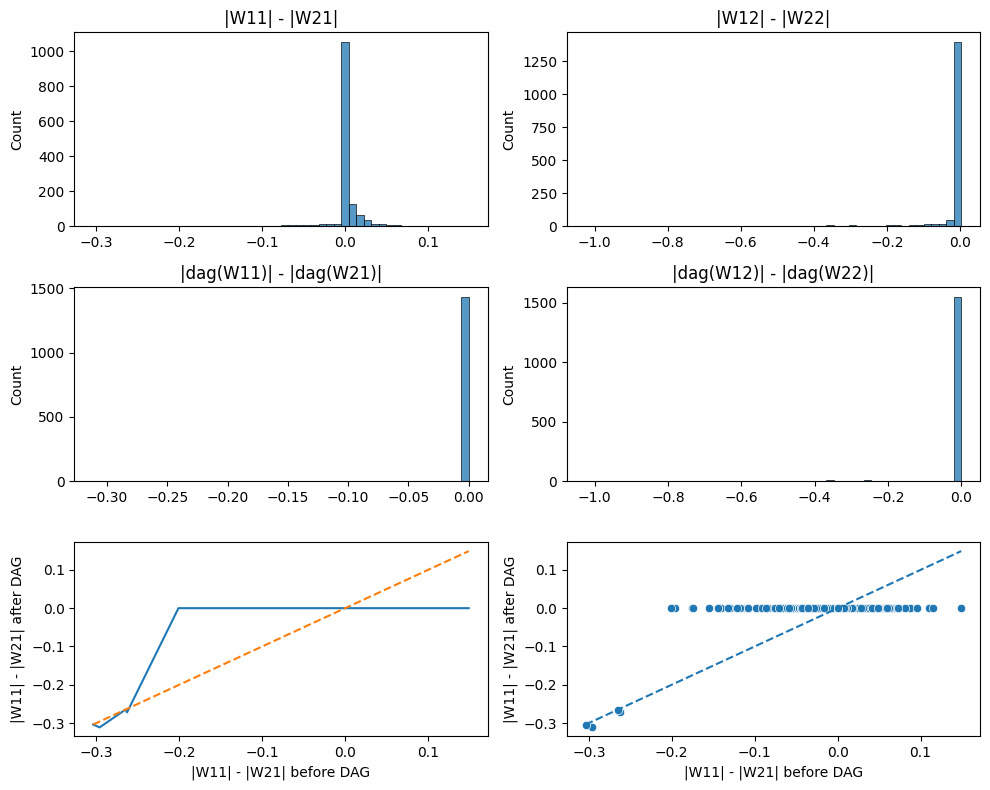

In [97]:
W_est, W_est_1, B_true = draw_results(40, 2)

DAG filtering, |W11| non-0 num:  0
DAG filtering, |W21| non-0 num:  1
DAG filtering, |W11| - |W21| non-0 num:  1


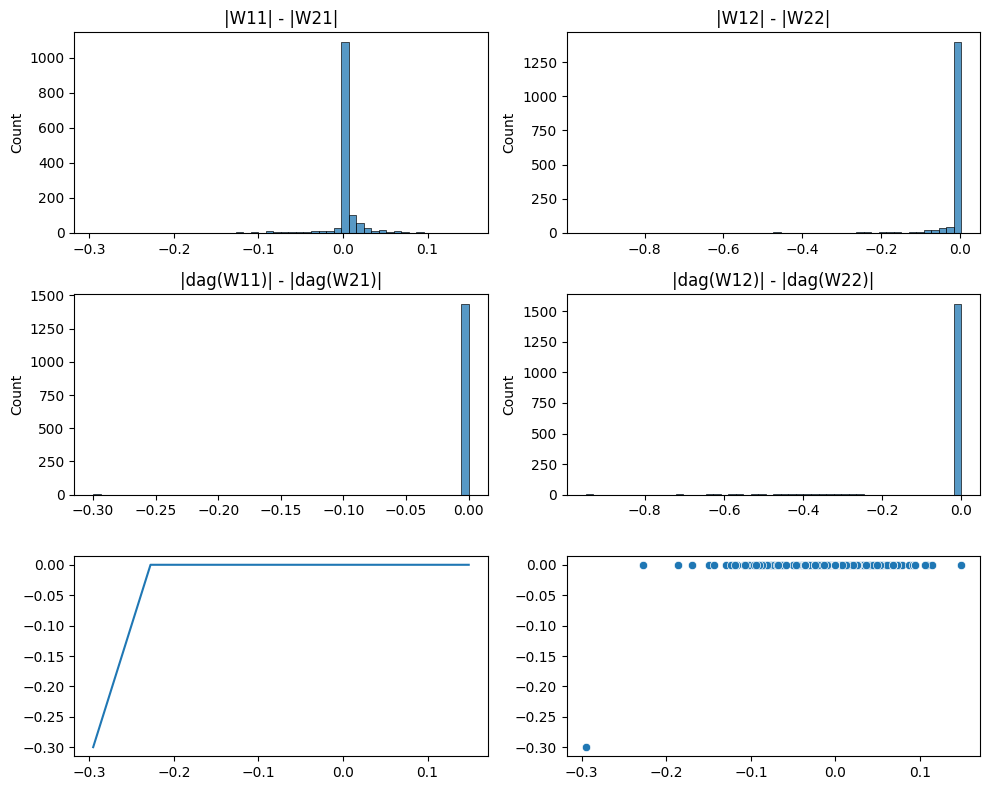

In [76]:
W_est, W_est_1, B_true = draw_results(40, 3)

DAG filtering, |W11| non-0 num:  0
DAG filtering, |W21| non-0 num:  0
DAG filtering, |W11| - |W21| non-0 num:  0


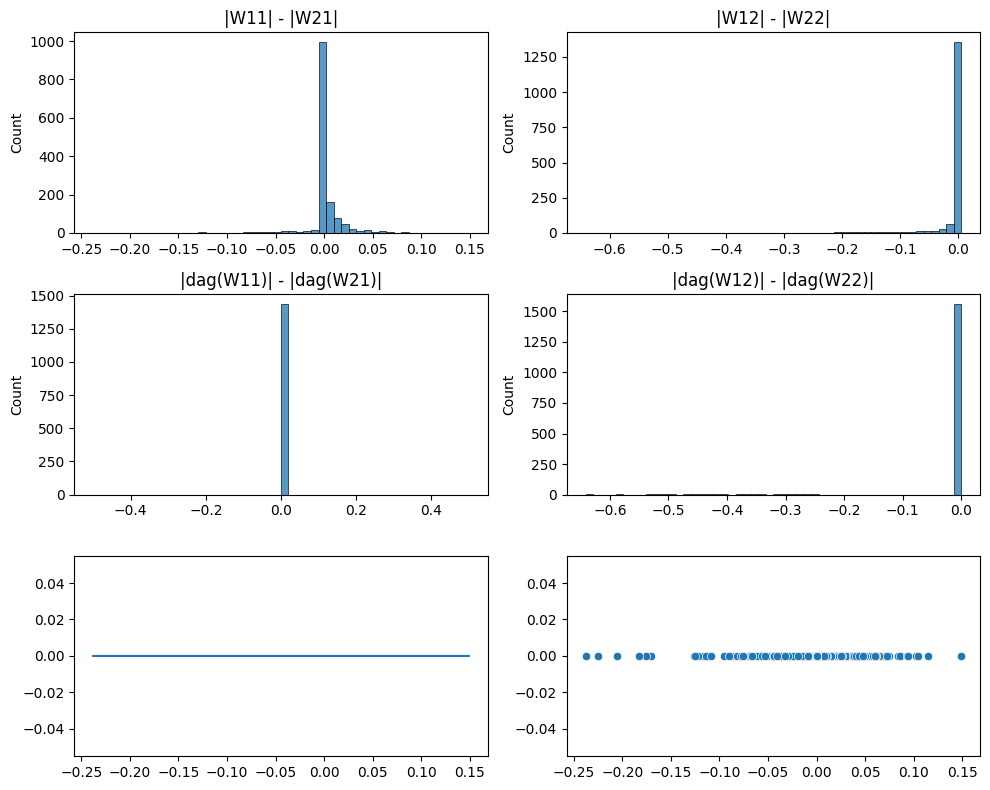

In [77]:
W_est, W_est_1, B_true = draw_results(40, 5)

DAG filtering, |W11| non-0 num:  0
DAG filtering, |W21| non-0 num:  0
DAG filtering, |W11| - |W21| non-0 num:  0


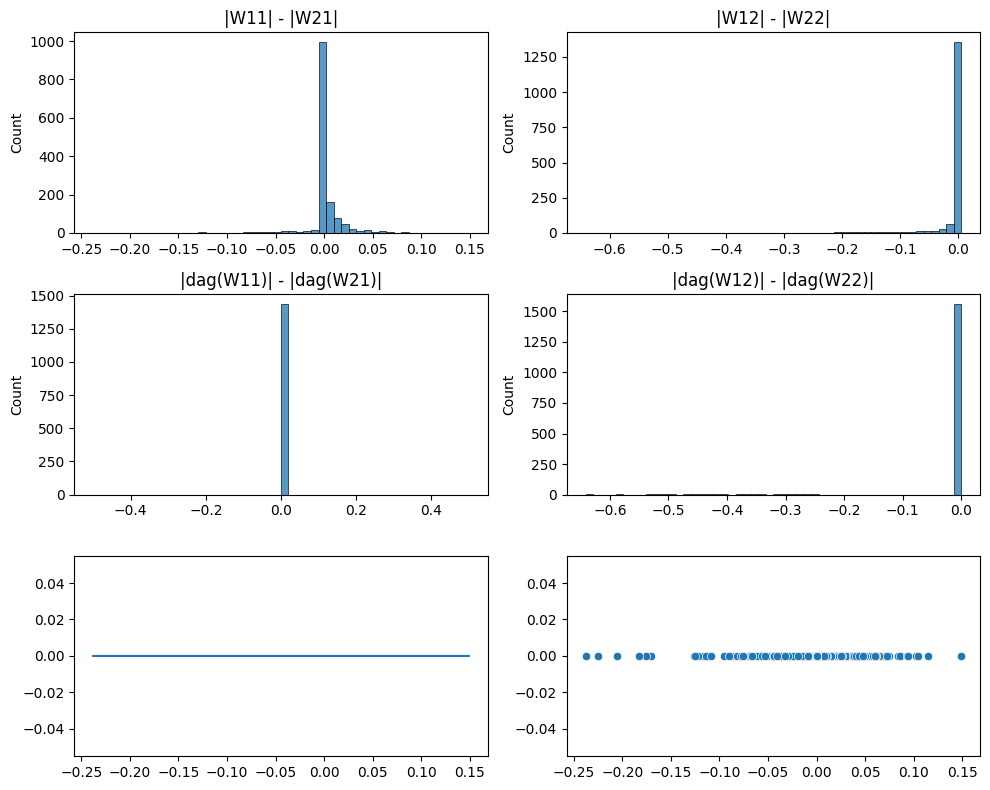

In [78]:
W_est, W_est_1, B_true = draw_results(40, 5)

DAG filtering, |W11| non-0 num:  22
DAG filtering, |W21| non-0 num:  16
DAG filtering, |W11| - |W21| non-0 num:  38


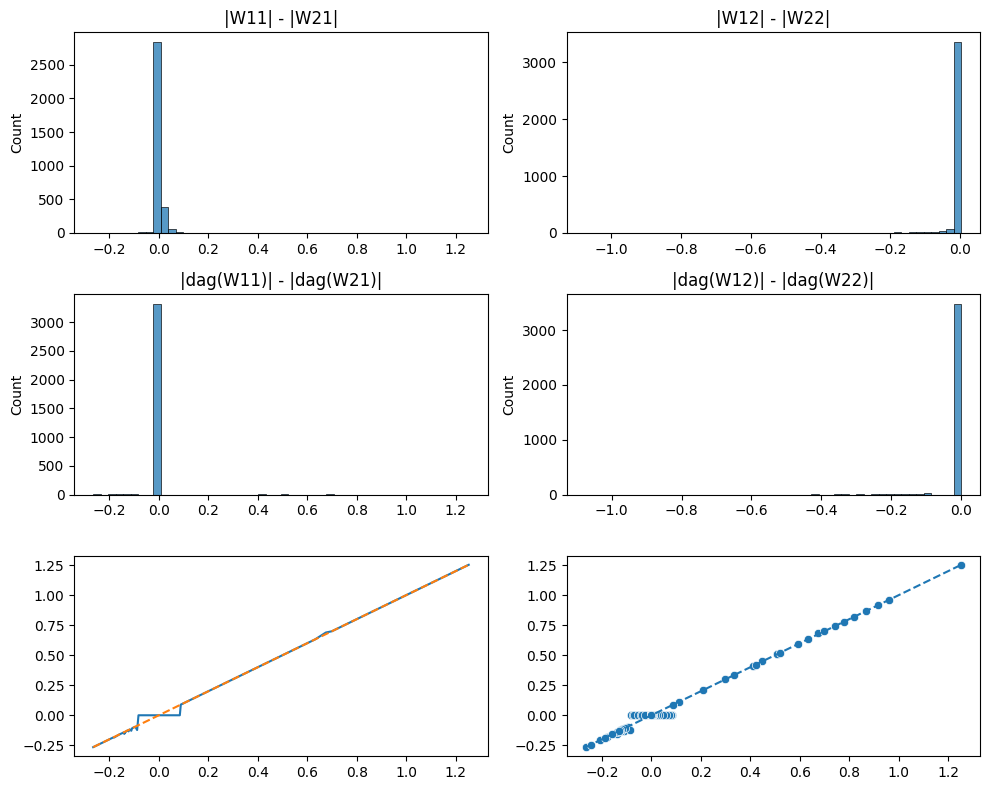

In [91]:
W_est, W_est_1, B_true = draw_results(60, 1)

DAG filtering, |W11| non-0 num:  37
DAG filtering, |W21| non-0 num:  2
DAG filtering, |W11| - |W21| non-0 num:  39


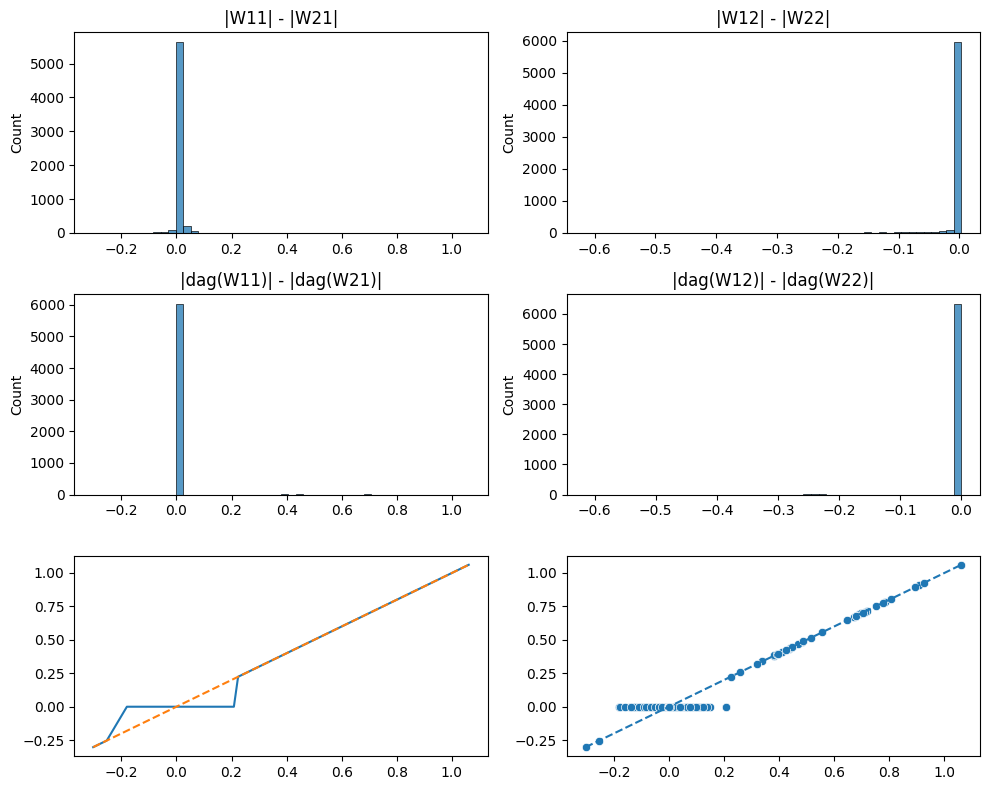

In [92]:
W_est, W_est_1, B_true = draw_results(80, 1)

# version 2: scatter plot

In [166]:
def draw_results_1(n_nodes, seed, version_path, alpha=0.1):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    """|W11| and |W21| only null before DAG filtering"""
    
    sns.scatterplot(x=np.abs(W_est[:n_nodes, :n_nodes])[~B_true].flatten(), 
                    y=np.abs(W_est[n_nodes:, :n_nodes])[~B_true].flatten(), alpha=alpha, ax=axs[0][0])
    axs[0][0].set_xlabel("|W11| only null before DAG")
    axs[0][0].set_ylabel("|W21| only null before DAG")

    """|W11| and |W21| only null after DAG filtering"""

    sns.scatterplot(x=np.abs(W_est_1[:n_nodes, :n_nodes])[~B_true].flatten(), 
                    y=np.abs(W_est_1[n_nodes:, :n_nodes])[~B_true].flatten(), alpha=alpha, ax=axs[0][1])
    axs[0][1].set_xlabel("|W11| only null after DAG")
    axs[0][1].set_ylabel("|W21| only null after DAG")

    """|W11| and |W21| before DAG filtering"""
    
    sns.scatterplot(x=np.abs(W_est[:n_nodes, :n_nodes])[~B_true].flatten(), 
                    y=np.abs(W_est[n_nodes:, :n_nodes])[~B_true].flatten(), alpha=alpha, ax=axs[0][2])
    sns.scatterplot(x=np.abs(W_est[:n_nodes, :n_nodes])[B_true].flatten(), 
                    y=np.abs(W_est[n_nodes:, :n_nodes])[B_true].flatten(), alpha=alpha, ax=axs[0][2])
    axs[0][2].set_xlabel("|W11| before DAG")
    axs[0][2].set_ylabel("|W21| before DAG")

    """|W11| and |W21| after DAG filtering"""

    sns.scatterplot(x=np.abs(W_est_1[:n_nodes, :n_nodes])[~B_true].flatten(), 
                    y=np.abs(W_est_1[n_nodes:, :n_nodes])[~B_true].flatten(), alpha=alpha, ax=axs[0][3])
    sns.scatterplot(x=np.abs(W_est_1[:n_nodes, :n_nodes])[B_true].flatten(), 
                    y=np.abs(W_est_1[n_nodes:, :n_nodes])[B_true].flatten(), alpha=alpha, ax=axs[0][3])
    axs[0][3].set_xlabel("|W11| after DAG")
    axs[0][3].set_ylabel("|W21| after DAG")

    """|W12| and |W22| before DAG filtering"""

    sns.scatterplot(x=np.abs(W_est[:n_nodes, n_nodes:]).flatten(), 
                    y=np.abs(W_est[n_nodes:, n_nodes:]).flatten(), alpha=alpha, ax=axs[1][0])
    axs[1][0].set_xlabel("|W12| before DAG")
    axs[1][0].set_ylabel("|W22| before DAG")

    """|W12| and |W22| after DAG filtering"""
    
    sns.scatterplot(x=np.abs(W_est_1[:n_nodes, n_nodes:]).flatten(), 
                    y=np.abs(W_est_1[n_nodes:, n_nodes:]).flatten(), alpha=alpha, ax=axs[1][1])
    axs[1][1].set_xlabel("|W12| after DAG")
    axs[1][1].set_ylabel("|W22| after DAG")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    # plt.legend()
    
    # Show the plot
    plt.show()

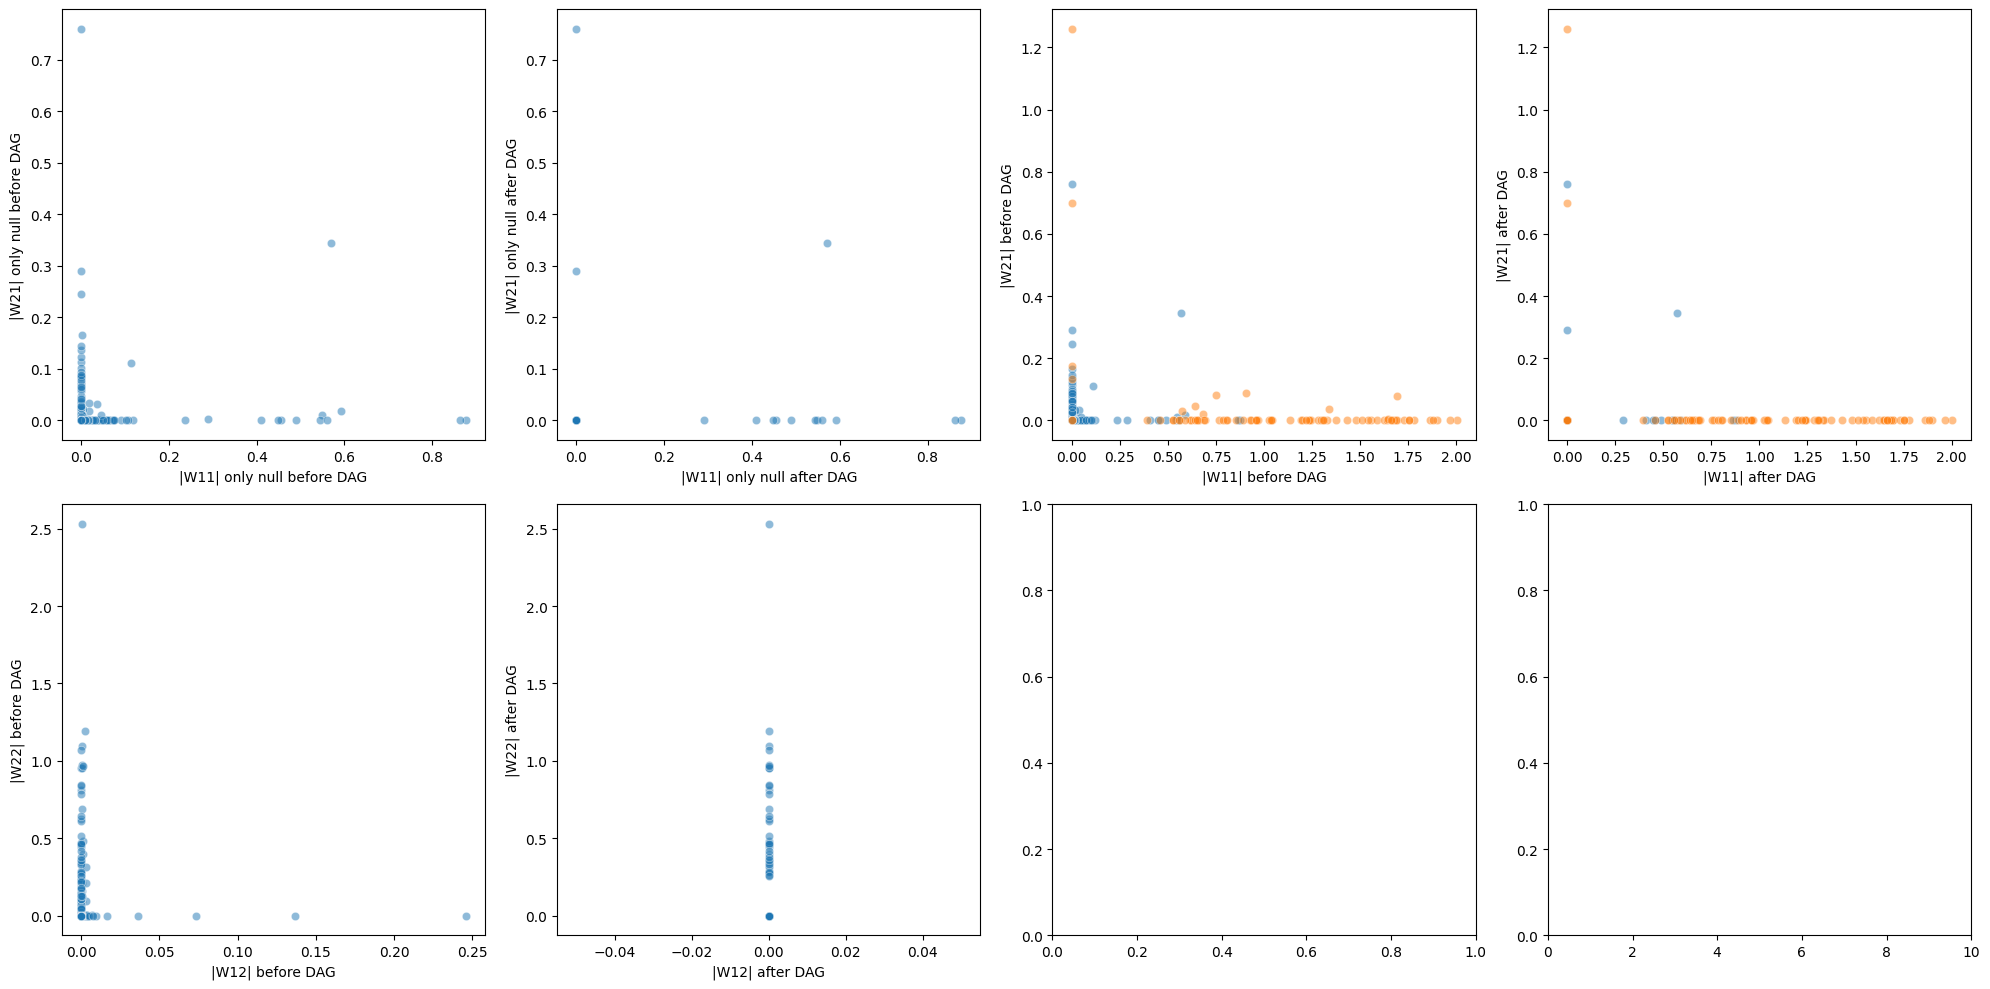

In [167]:
draw_results_1(20, 1, "v11/v20", 0.5)

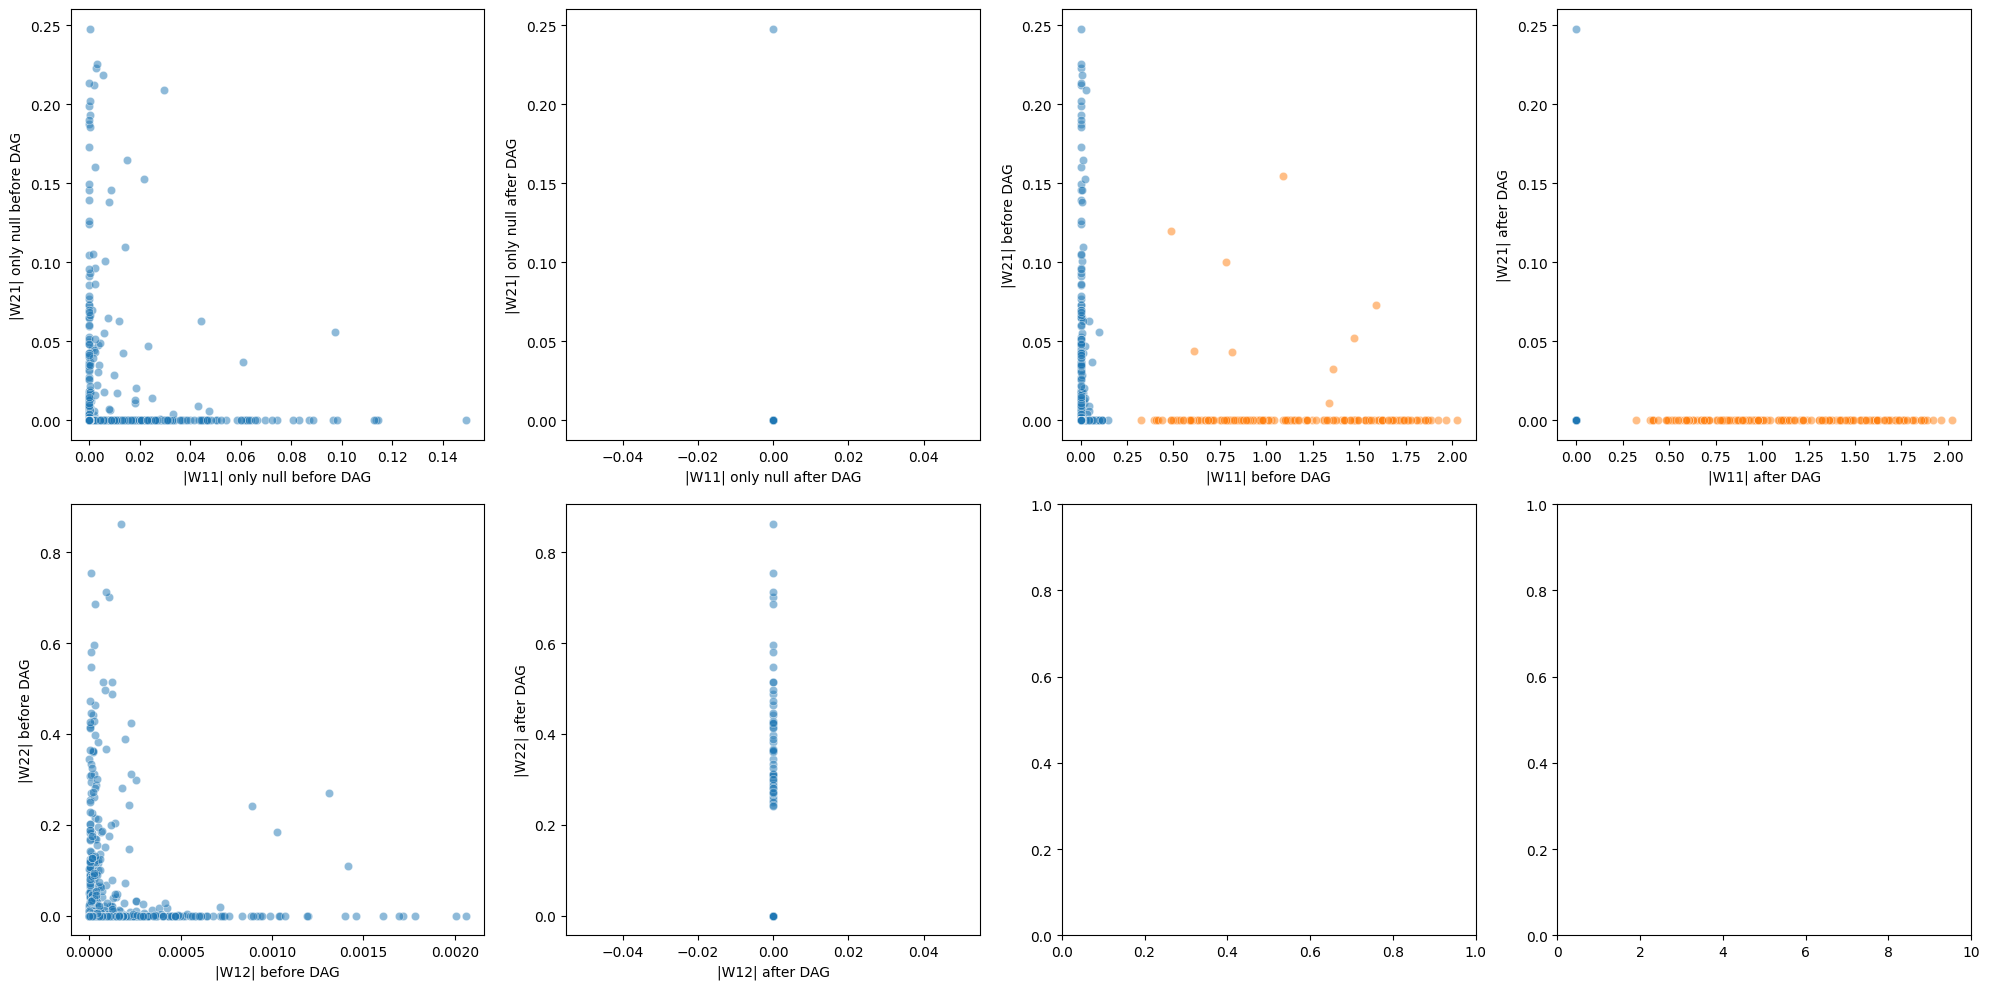

In [207]:
draw_results_1(40, 1, "v11/v40", 0.5)

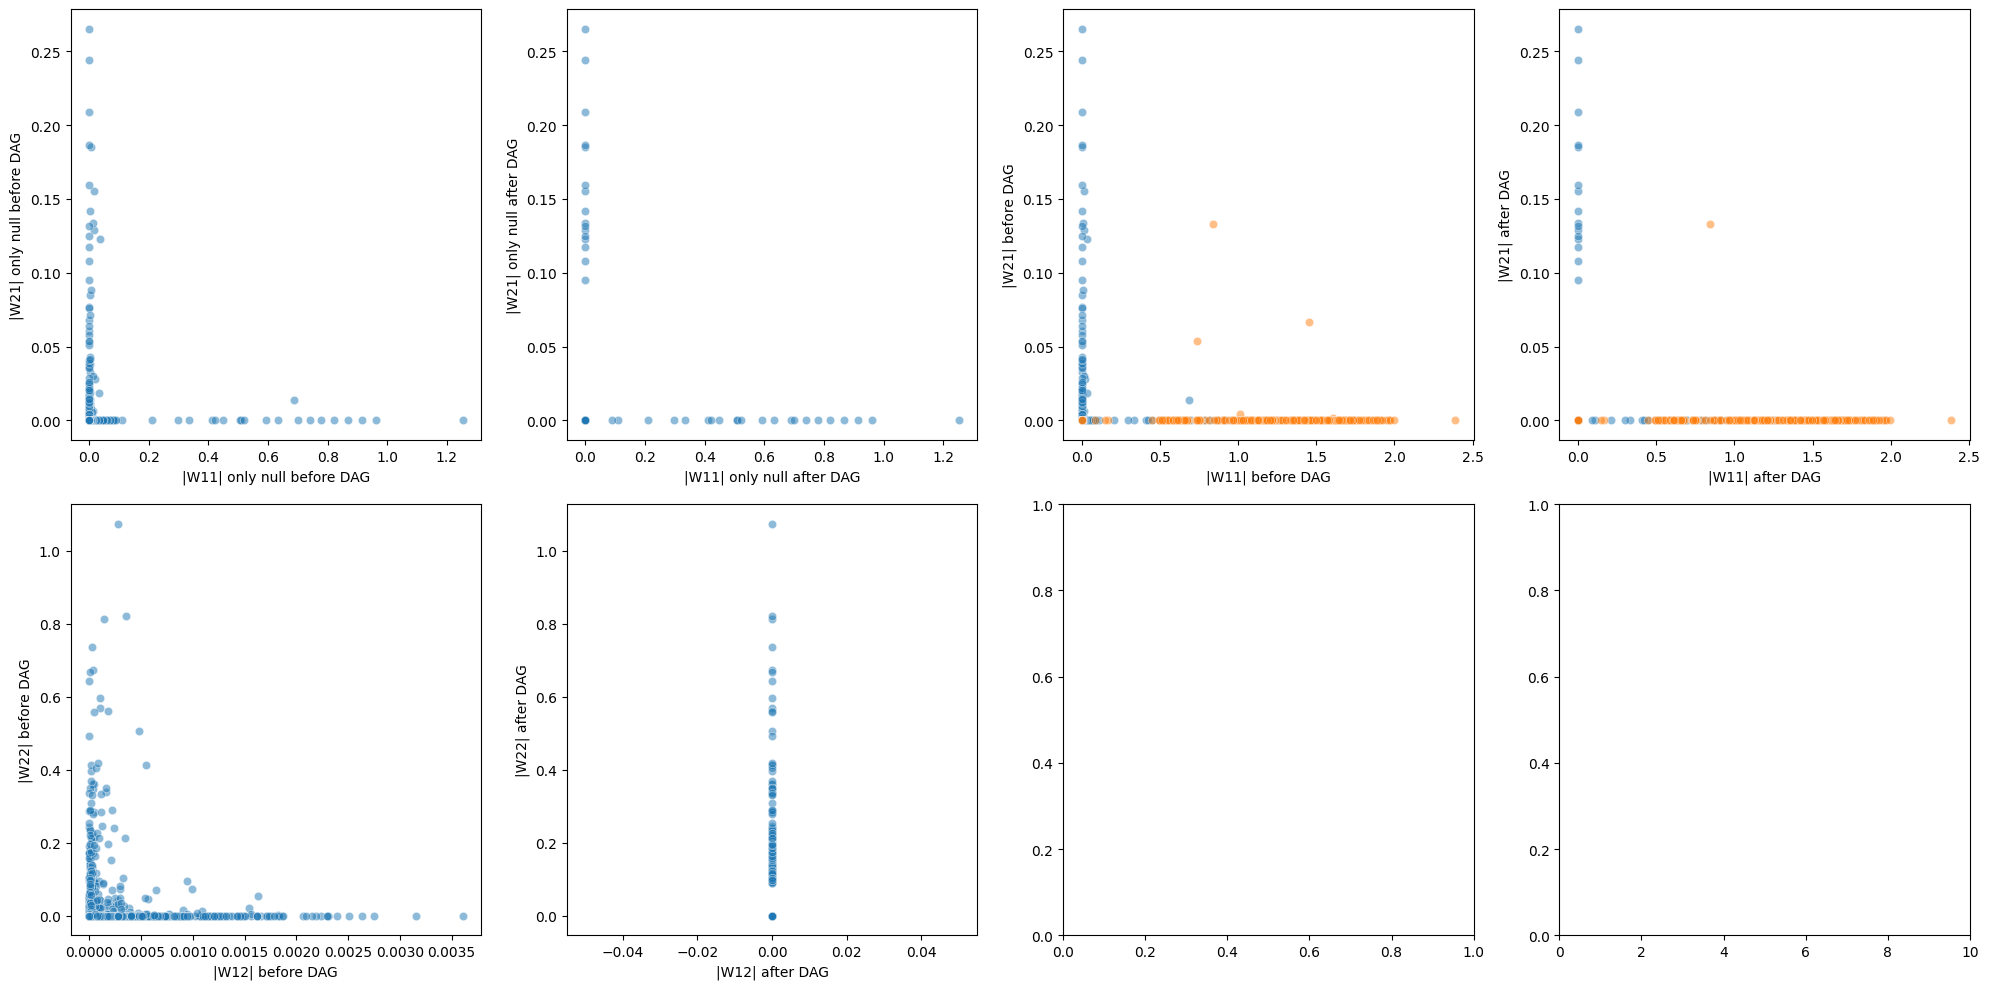

In [168]:
draw_results_1(60, 1, "v11/v60", 0.5)

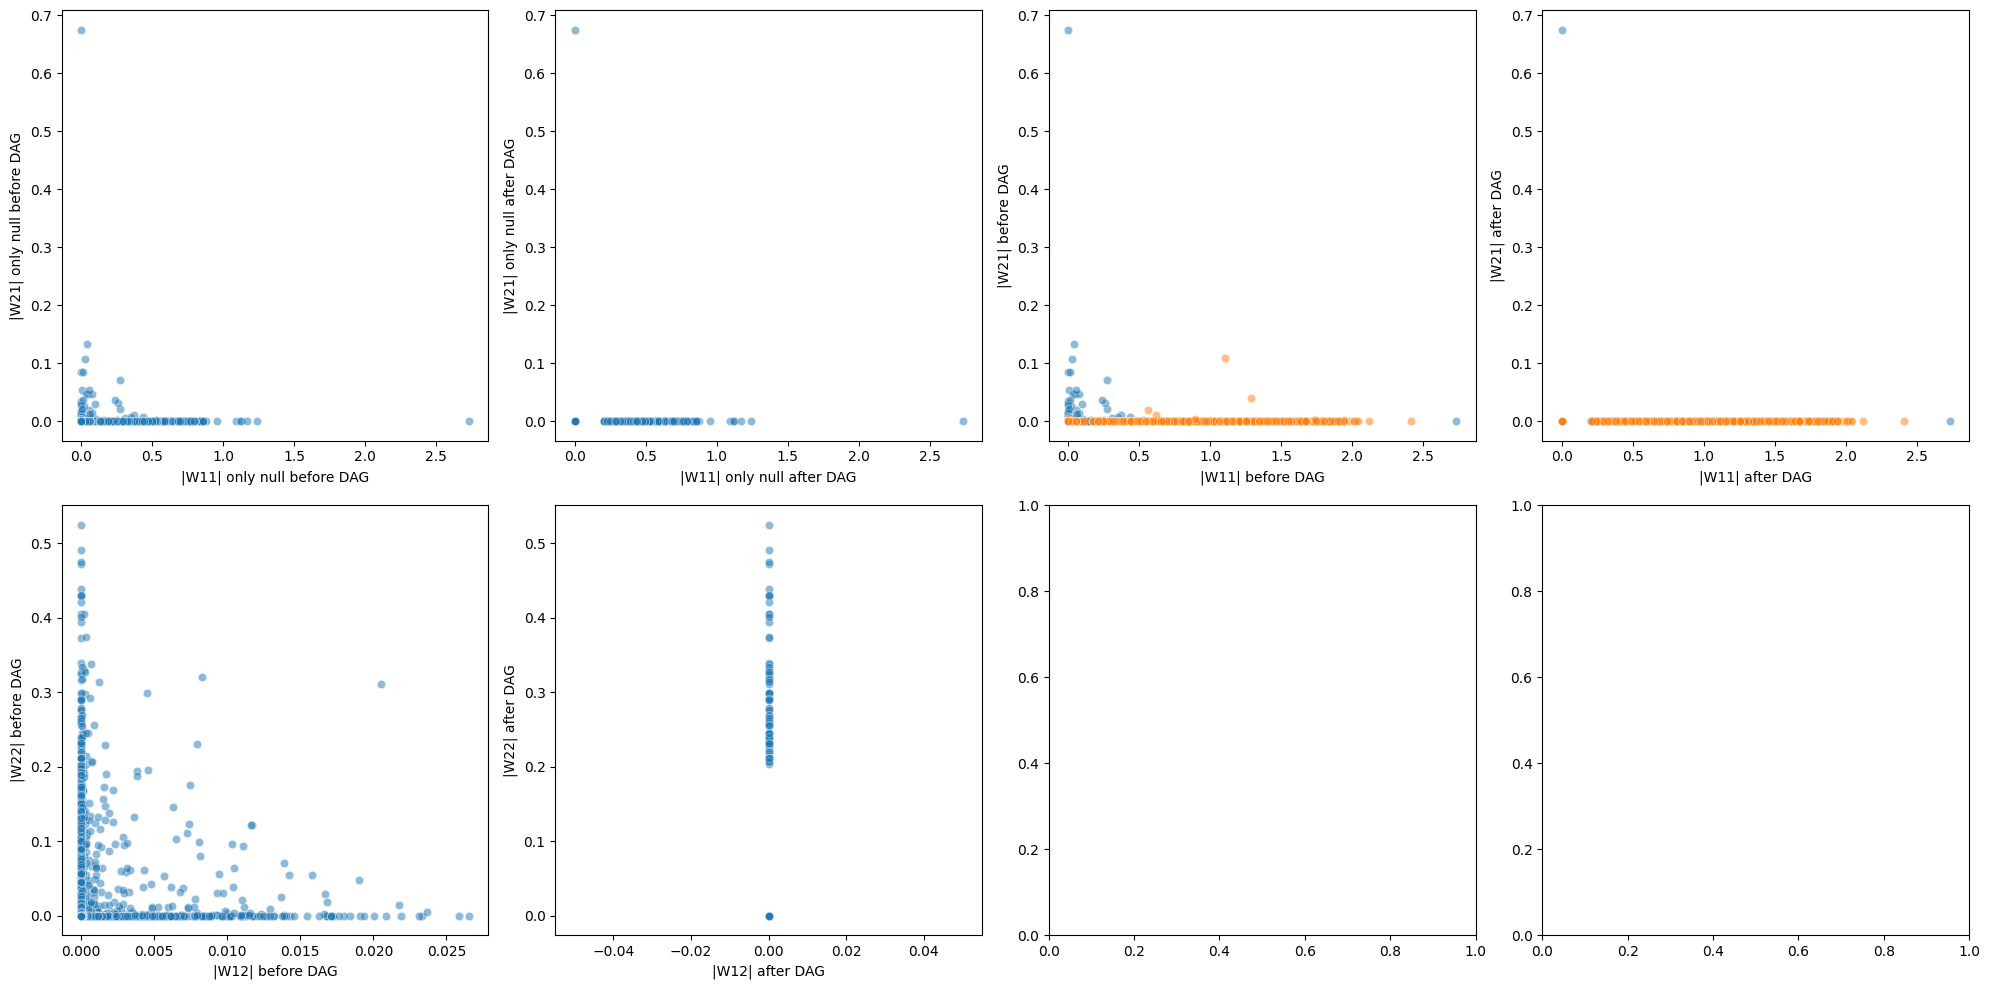

In [160]:
draw_results_1(80, 6, "v33/v80_480", 0.5)

# version 3: CDF

In [170]:
def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    return B_true, W_est, W_est_1

In [198]:
def draw_results_3(n_nodes, seed, version_path):
    B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W21| null after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W22| after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][0], label='log|W12| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][1], label='log|W12| after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][2], label='log|W21| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][3], label='log|W21| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][3], label='log|W22| after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][0], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][2], label='log|W21| null before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][3], label='log|W21| null after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    plt.tight_layout()
    # plt.legend()
    plt.show()

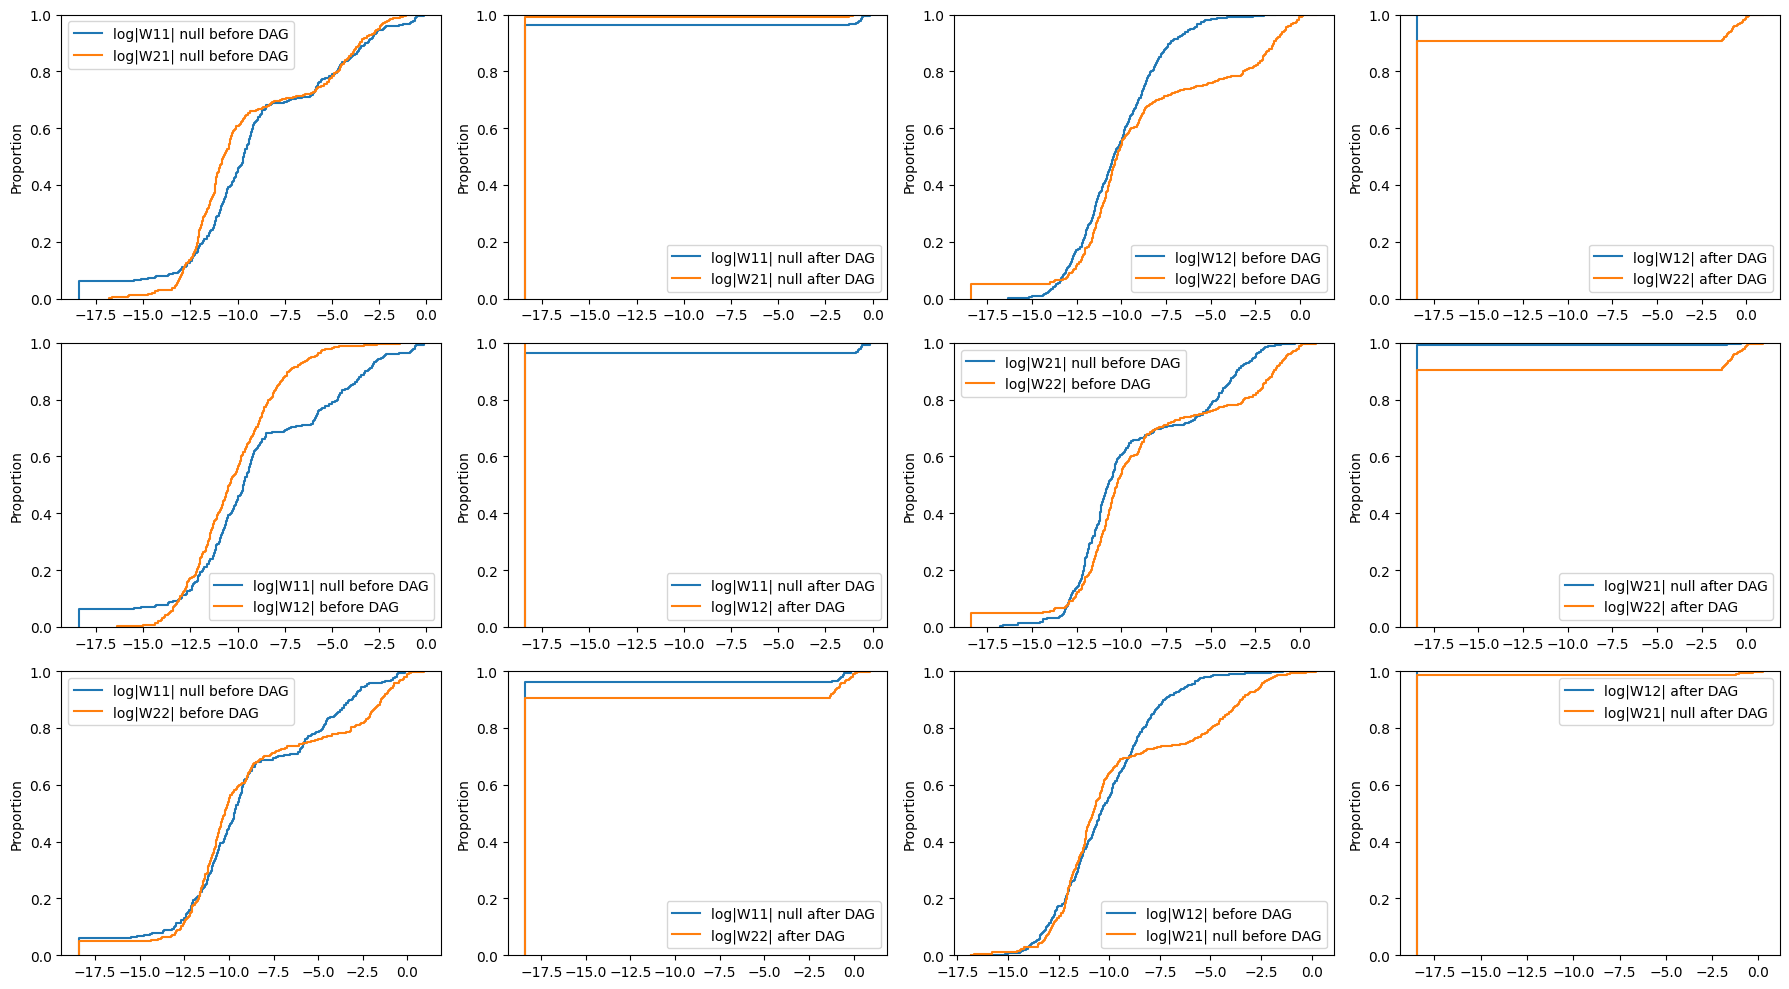

In [199]:
draw_results_3(20, 1, "v11/v20")

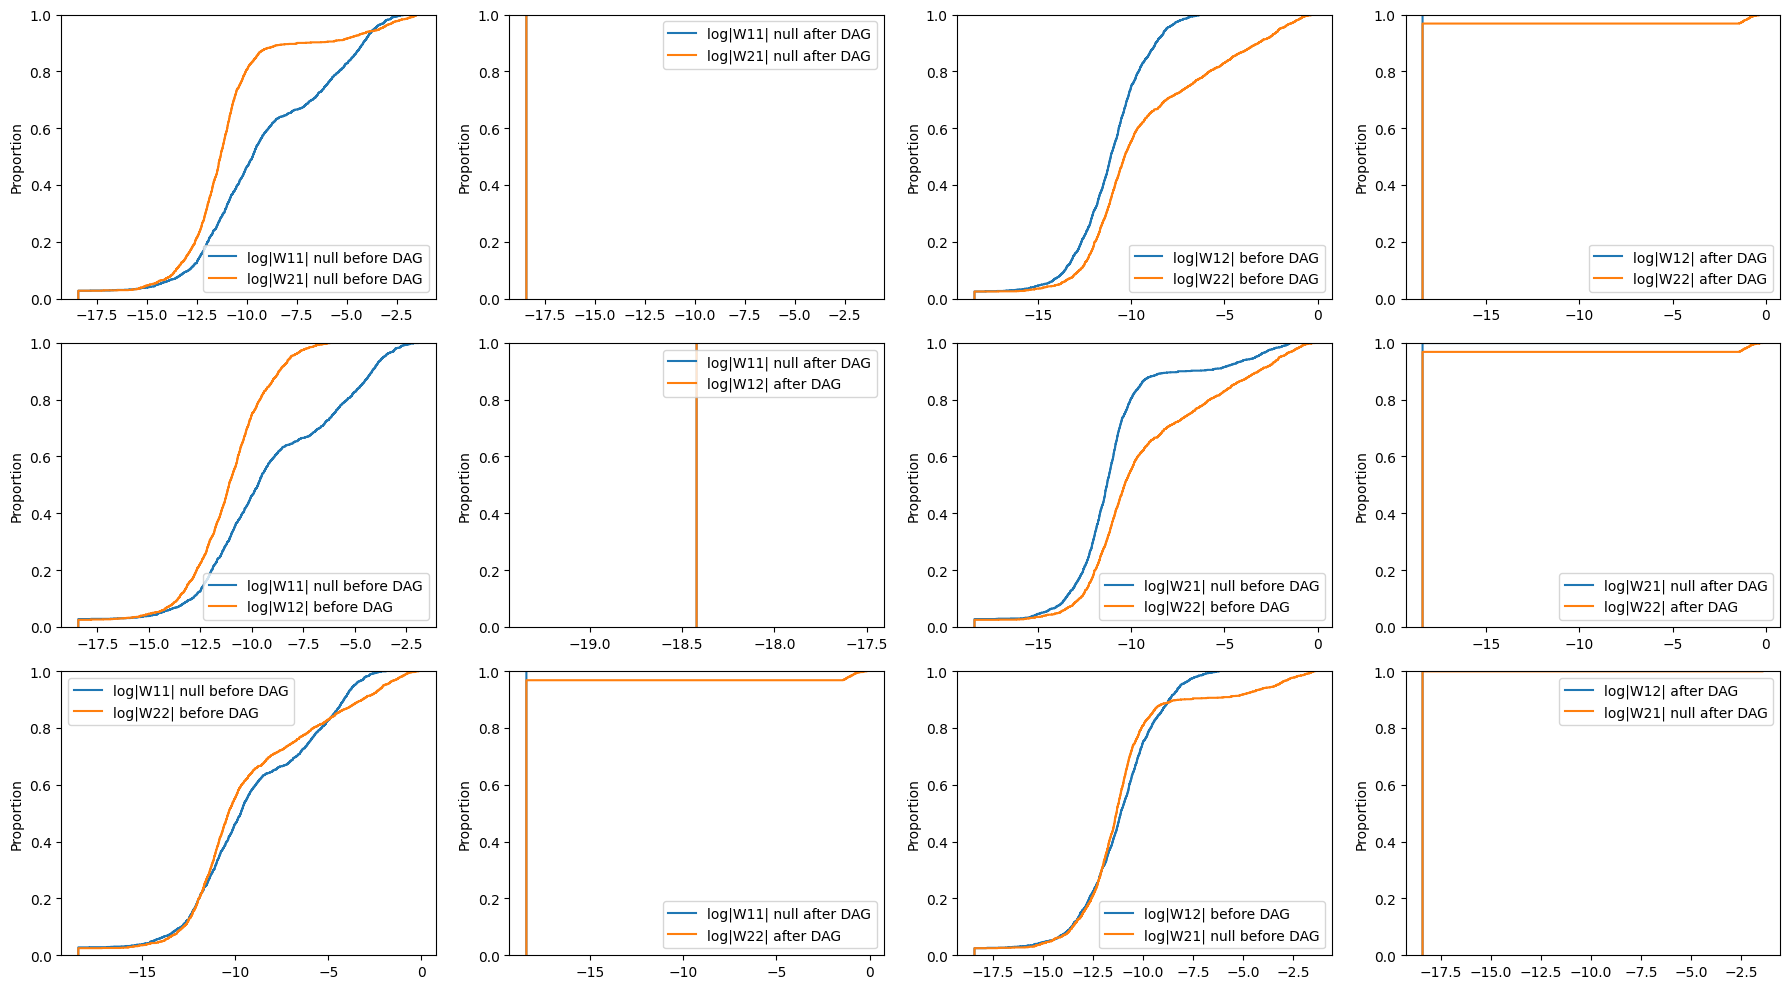

In [201]:
draw_results_3(40, 1, "v11/v40")

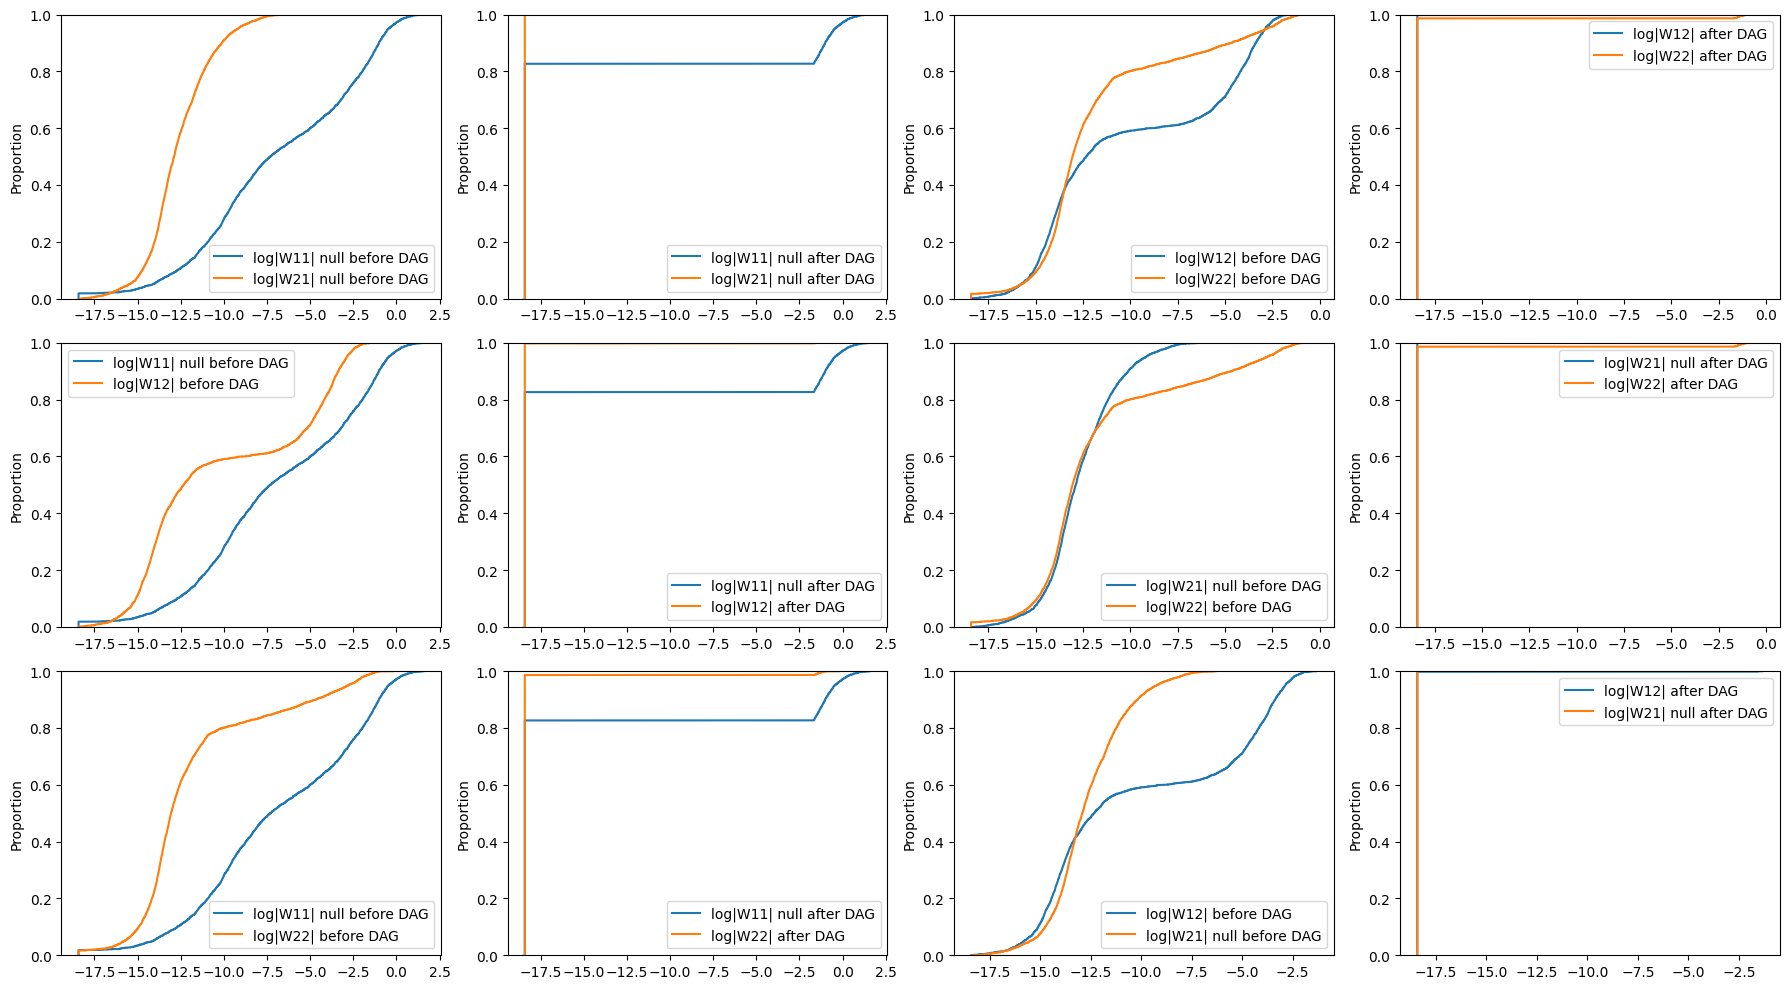

In [206]:
draw_results_3(60, 6, "v33/v60_360")

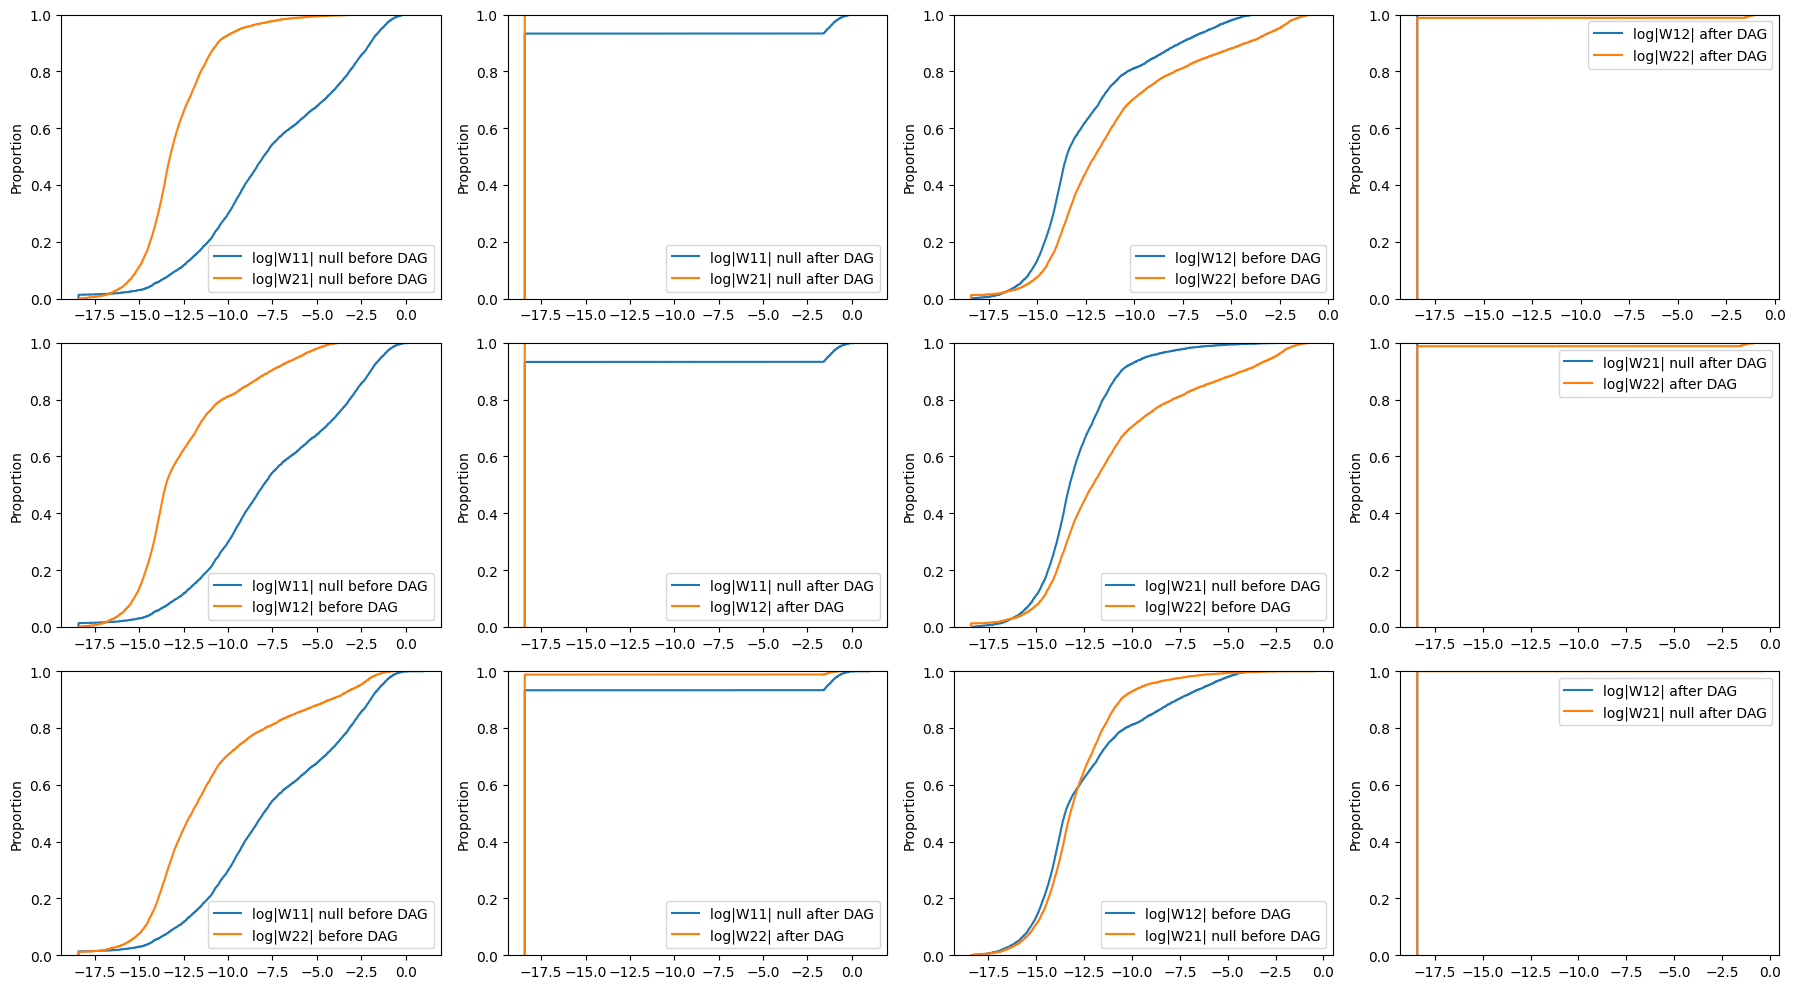

In [200]:
draw_results_3(80, 6, "v33/v80_480")

# version 4: stripplot of original - knockoff

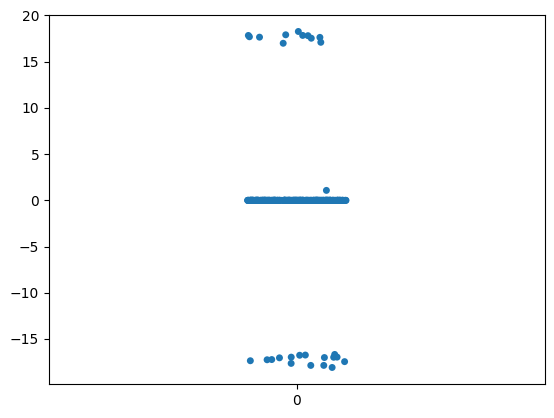

In [227]:
B_true, W_est, W_est_1 = load_data(20, 2, "v11/v20")
n_nodes = 20
fig, axs = plt.subplots(1, 1)
sns.stripplot([
    np.log(
        (np.abs(W_est_1[:n_nodes, :n_nodes][~B_true]) + 1e-8) / \
        (np.abs(W_est_1[n_nodes:, :n_nodes][~B_true]) + 1e-8)
    )
    ], ax=axs
)
plt.show()

# Misc

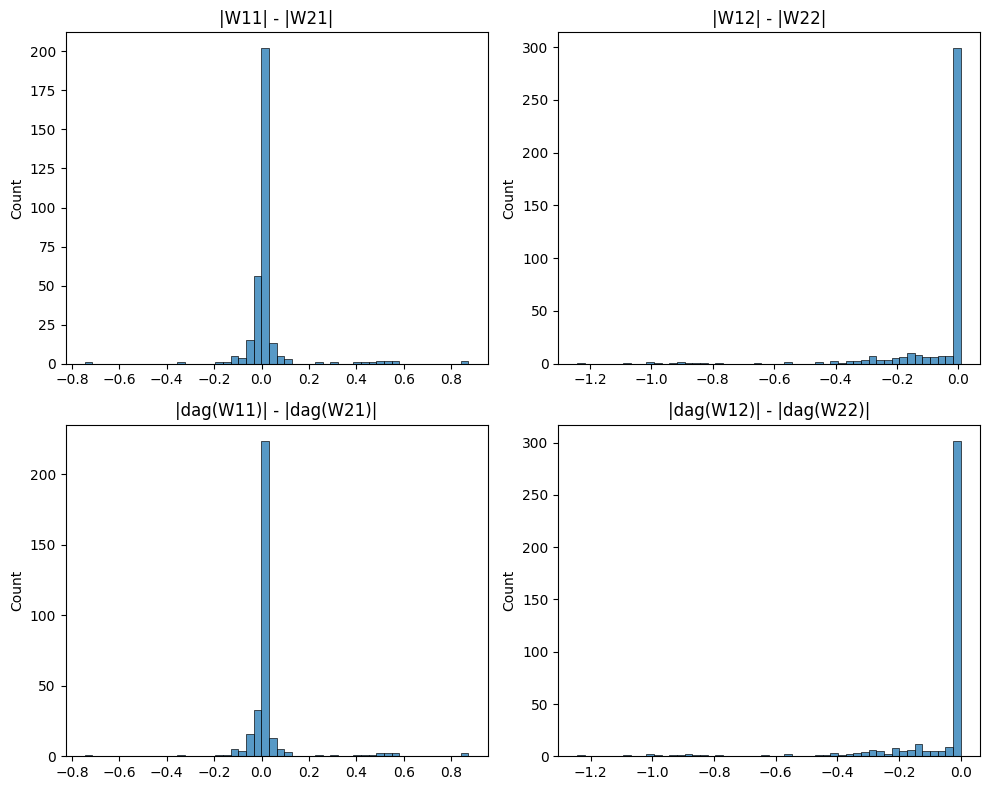

In [40]:
root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
n_nodes = 20
seed = 1

with open(os.path.join(root_path, f'v10/W/W_{seed}_0.pkl'), 'rb') as f:
    W = pickle.load(f)
with open(os.path.join(root_path, f'v10/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
W_est = W['W_est']
W = W['W_est'][:, :n_nodes]
Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
W_true = X['W_true']
B_true = (W_true != 0)

W_est_abs = np.abs(W_est)
mask = utils.extract_dag_mask(W_est_abs, 0)
W_est_abs[~mask] = 0.

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot((np.abs(W_est[:n_nodes, :n_nodes]) -  np.abs(W_est[n_nodes:, :n_nodes]))[~B_true].flatten(), bins=50, ax=axs[0][0])
axs[0][0].set_title('|W11| - |W21|')
sns.histplot((np.abs(W_est[:n_nodes, n_nodes:]) -  np.abs(W_est[n_nodes:, n_nodes:])).flatten(), bins=50, ax=axs[0][1])
axs[0][1].set_title('|W12| - |W22|')
sns.histplot((np.abs(W_est_abs[:n_nodes, :n_nodes]) -  np.abs(W_est_abs[n_nodes:, :n_nodes]))[~B_true].flatten(), bins=50, ax=axs[1][0])
axs[1][0].set_title('|dag(W11)| - |dag(W21)|')
sns.histplot((np.abs(W_est_abs[:n_nodes, n_nodes:]) -  np.abs(W_est_abs[n_nodes:, n_nodes:])).flatten(), bins=50, ax=axs[1][1])
axs[1][1].set_title('|dag(W12)| - |dag(W22)|')

# Adjust spacing between subplots
plt.tight_layout()
# plt.legend()

# Show the plot
plt.show()